In this notebook, we analyse the Seattle AirBnB dataset. 
The data is available at: https://www.kaggle.com/airbnb/seattle

We would like to understand a few insights from the data:  

    1. How are the prices of properties distributed across the neighborhoods?
    
    2. Are there price variations within the year? Which months are most expensive and which are not?  
    
    3. Which are the important factors for determining the price of a property? Can we model this?   

## 1. Setup

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

%matplotlib inline

In [173]:
pd.options.display.max_columns = 500

## 2. Load Data

In [174]:
dfListings = pd.read_csv('./listings.csv')

In [175]:
dfListings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [176]:
ListingsColumns = ['id','host_id','host_since','host_response_time','host_response_rate', \
                   'host_acceptance_rate','host_is_superhost', 'host_identity_verified', \
                   'neighbourhood_group_cleansed', 'property_type','room_type','accommodates','bathrooms',\
                   'bedrooms','guests_included','minimum_nights','review_scores_rating','reviews_per_month']

In [177]:
dfListings = dfListings[ListingsColumns]

In [178]:
dfListings.shape

(3818, 18)

In [179]:
dfCalender = pd.read_csv('./calendar.csv')

In [180]:
dfCalender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


## 3. Exploratory Data Analysis 

### a. Number of hosts and number of listings

In [181]:
no_hosts = dfListings['host_id'].nunique()
no_listings = dfListings.shape[0]

print("Number of hosts = {} & number of listings in Seattle = {}".format(no_hosts,no_listings))

Number of hosts = 2751 & number of listings in Seattle = 3818


In [182]:
dfCalender['date'] = pd.to_datetime(dfCalender['date'])

In [183]:
mindate = dfCalender['date'].min()
maxdate = dfCalender['date'].max()
print("Data Duration: {} to {}".format(mindate,maxdate))

Data Duration: 2016-01-04 00:00:00 to 2017-01-02 00:00:00


### b. Duplicate Data

In [184]:
duplicatedListings = dfListings.duplicated().sum()

print("Duplicated Listings Rows = {}".format(duplicatedListings))

Duplicated Listings Rows = 0


In [185]:
duplicatedCalender = dfCalender.duplicated().sum()

print("Duplicated Calender Dataset Rows = {}".format(duplicatedCalender))

Duplicated Calender Dataset Rows = 0


### c. Missing Data

In [186]:
dfListings.isna().mean().sort_values(ascending=False)

host_acceptance_rate            0.202462
review_scores_rating            0.169460
reviews_per_month               0.164222
host_response_time              0.136983
host_response_rate              0.136983
bathrooms                       0.004191
bedrooms                        0.001572
host_since                      0.000524
host_identity_verified          0.000524
host_is_superhost               0.000524
property_type                   0.000262
host_id                         0.000000
neighbourhood_group_cleansed    0.000000
room_type                       0.000000
accommodates                    0.000000
guests_included                 0.000000
minimum_nights                  0.000000
id                              0.000000
dtype: float64

In [187]:
dfCalender.isna().mean().sort_values(ascending=False)

price         0.32939
available     0.00000
date          0.00000
listing_id    0.00000
dtype: float64

### d. Feature Preprocessing 

##### i. Drop calender data without price values

In [188]:
dfCalender.dropna(inplace=True)

In [189]:
dfCalender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00


##### ii. Change "price" to float, and "available" to boolean in Calender data

In [190]:
dfCalender.price = dfCalender.price.str.replace('$','')

In [191]:
dfCalender.price = dfCalender.price.str.replace(',','').astype('float')

In [192]:
dfCalender['available'].replace({'t':1,'f':0},inplace=True)

In [193]:
dfCalender.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,85.0
1,241032,2016-01-05,1,85.0
9,241032,2016-01-13,1,85.0
10,241032,2016-01-14,1,85.0
14,241032,2016-01-18,1,85.0


##### iii. Listings Data : Change "host_response_rate", "host_acceptance_rate" to float, and "host_is_superhost" ," host_identity_verified"	 to boolean)

In [194]:
dfListings.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,review_scores_rating,reviews_per_month
0,241032,956883,2011-08-11,within a few hours,96%,100%,f,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07
1,953595,5177328,2013-02-21,within an hour,98%,100%,t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1,2,96.0,1.48
2,3308979,16708587,2014-06-12,within a few hours,67%,100%,f,t,Queen Anne,House,Entire home/apt,11,4.5,5.0,10,4,97.0,1.15
3,7421966,9851441,2013-11-06,NaN,NaN,NaN,f,t,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,1,1,NaN,NaN
4,278830,1452570,2011-11-29,within an hour,100%,NaN,f,t,Queen Anne,House,Entire home/apt,6,2.0,3.0,6,1,92.0,0.89


In [195]:
dfListings['host_acceptance_rate'] = dfListings['host_acceptance_rate'].str.replace('%','').astype('float')

In [196]:
dfListings['host_response_rate'] = dfListings['host_response_rate'].str.replace('%','').astype('float')

In [197]:
dfListings['host_is_superhost'].replace({'f':0,'t':1},inplace=True)

In [198]:
dfListings['host_identity_verified'].replace({'f':0,'t':1},inplace=True)

In [199]:
dfListings.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,review_scores_rating,reviews_per_month
0,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07
1,953595,5177328,2013-02-21,within an hour,98.0,100.0,1.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1,2,96.0,1.48
2,3308979,16708587,2014-06-12,within a few hours,67.0,100.0,0.0,1.0,Queen Anne,House,Entire home/apt,11,4.5,5.0,10,4,97.0,1.15
3,7421966,9851441,2013-11-06,NaN,NaN,NaN,0.0,1.0,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,1,1,NaN,NaN
4,278830,1452570,2011-11-29,within an hour,100.0,NaN,0.0,1.0,Queen Anne,House,Entire home/apt,6,2.0,3.0,6,1,92.0,0.89


In [200]:
dfListings.host_response_time.value_counts()

within an hour        1692
within a few hours     968
within a day           597
a few days or more      38
Name: host_response_time, dtype: int64

In [201]:
dfListings.neighbourhood_group_cleansed.value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

### d. Correlation of Price with various features

##### i. Combine the dataframes to capture price in conjunction with other variations

In [202]:
dfListings.rename(columns={'id':'listing_id'},inplace=True)

In [203]:
dfCombined = pd.merge(dfListings,dfCalender)

In [204]:
dfCombined.head()

,listing_id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,review_scores_rating,reviews_per_month,date,available,price
0,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,2016-01-04,1,85.0
1,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,2016-01-05,1,85.0
2,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,2016-01-13,1,85.0
3,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,2016-01-14,1,85.0
4,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,2016-01-18,1,85.0


##### ii. Extract month from date and drop date column

In [205]:
dfCombined['month'] = dfCombined['date'].dt.month

In [206]:
dfCombined['year'] = dfCombined['date'].dt.year

In [207]:
dfCombined.head()

,listing_id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,review_scores_rating,reviews_per_month,date,available,price,month,year
0,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,2016-01-04,1,85.0,1,2016
1,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,2016-01-05,1,85.0,1,2016
2,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,2016-01-13,1,85.0,1,2016
3,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,2016-01-14,1,85.0,1,2016
4,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,2016-01-18,1,85.0,1,2016


In [208]:
dfCombined.drop(['date'],axis=1,inplace=True)

##### iii. Convert host_since to datetime object

In [209]:
dfCombined['host_since'] = pd.to_datetime(dfCombined['host_since'],errors='coerce')

In [210]:
dfCombined.head()

,listing_id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,review_scores_rating,reviews_per_month,available,price,month,year
0,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,1,85.0,1,2016
1,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,1,85.0,1,2016
2,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,1,85.0,1,2016
3,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,1,85.0,1,2016
4,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,1,85.0,1,2016


In [211]:
corrmat = dfCombined.select_dtypes(include=['number']).drop(['listing_id','host_id','available'],axis=1).corr()

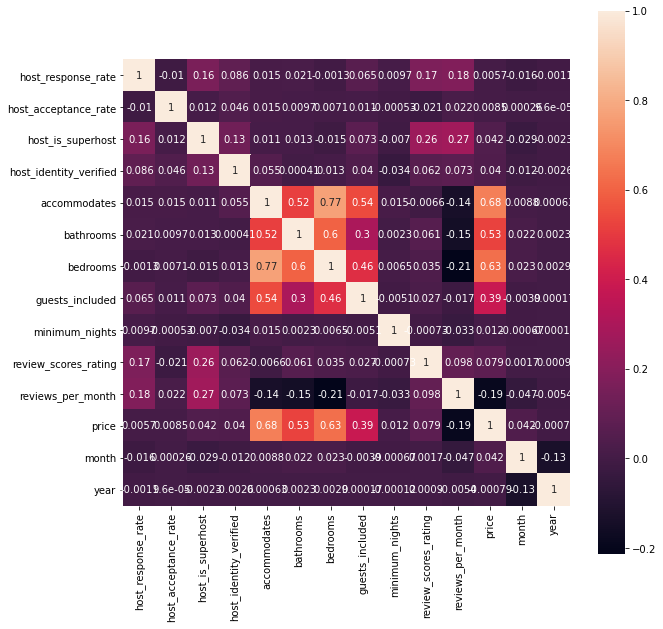

In [212]:
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,
            annot=True,
            square=True          
           )

As expected, property parameters related to the size and broader ameneties (number of bedrooms, bathrooms, number of people the property accommodates) determine the price to a large extent and even features like time of the year (month), review_scores, and host related features like host_identity_verified, and host_is_superhost determine the price of the property to some extent.

#### Number of listings by month for 2016

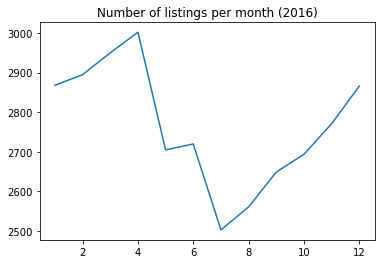

In [216]:
plt.plot(dfCombined[dfCombined['year'] == 2016].groupby(['month'])['listing_id'].nunique());
plt.title('Number of listings per month (2016)');

* Summer (July) has lower listings than other months 

#### Price Variation by Month

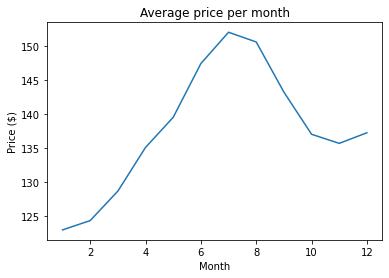

In [221]:
plt.plot(dfCombined.groupby(['month'])['price'].mean());
plt.title('Average price per month');
plt.xlabel('Month');
plt.ylabel('Price ($)');

* Summer (July) also has the highest average rates than other parts of the year, and to a lesser extent December as well indicating holiday season to be expensive time to visit Seattle.

#### Prices against neighborhoods

In [225]:
dfNeighborhood = dfCombined.groupby(['neighbourhood_group_cleansed','month'])['price'].mean()

In [232]:
neighborhoods = dfCombined.neighbourhood_group_cleansed.unique()

In [ ]:
dfCombined.groupby(['neigh'])

* Thus we now have enough features correlating to price so we can go ahead and build a model

## 4. Model

In [40]:
dfCombinedCat =  pd.get_dummies(dfCombined.select_dtypes(['object'])) 

In [41]:
dfCombinedCat.head()

,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [42]:
dfCombined.shape

(934542, 21)

In [43]:
dfCombinedFinal = pd.concat([dfCombined.select_dtypes(['number']),dfCombinedCat],axis=1)

In [44]:
dfCombinedFinal.head()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,review_scores_rating,reviews_per_month,available,price,month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,241032,956883,96.0,100.0,0.0,1.0,4,1.0,1.0,2,1,95.0,4.07,1,85.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,241032,956883,96.0,100.0,0.0,1.0,4,1.0,1.0,2,1,95.0,4.07,1,85.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,241032,956883,96.0,100.0,0.0,1.0,4,1.0,1.0,2,1,95.0,4.07,1,85.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,241032,956883,96.0,100.0,0.0,1.0,4,1.0,1.0,2,1,95.0,4.07,1,85.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,241032,956883,96.0,100.0,0.0,1.0,4,1.0,1.0,2,1,95.0,4.07,1,85.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [45]:
# dfCombinedFinal.isna().mean().sort_values(ascending=False)

In [46]:
dfCombinedFinal.shape

(934542, 56)

In [47]:
dfCombinedFinal.dropna(axis=0,inplace=True)

In [48]:
X = dfCombinedFinal.drop(['listing_id','host_id','price'],axis=1)

In [49]:
y = dfCombinedFinal['price']

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import xgboost

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [52]:
LinRegModel = LinearRegression()

In [53]:
LinRegModel.fit(X_train,y_train)

LinearRegression()

In [54]:
print("Linear Regression Model: Train Score = {:.2f}".format(LinRegModel.score(X_train,y_train)))

Linear Regression Model: Train Score = 0.67


In [55]:
print("Linear Regression Model: Test Score = {:.2f}".format(LinRegModel.score(X_test,y_test)))

Linear Regression Model: Test Score = 0.67


In [56]:
LinRegModel.coef_

array([-2.26885646e-01, -4.96702744e-01,  1.85440544e+01,  7.72559783e+00,
        1.22925065e+01,  3.52066805e+01,  3.27729118e+01,  2.09332798e+00,
        9.39747174e-03,  8.44015428e-01, -4.10579211e+00, -1.01252340e-13,
        1.11137426e+00, -3.75209698e+00, -1.16225202e+00,  1.88845638e+00,
        3.02589262e+00, -3.42264715e+00, -1.69477435e+01,  1.94558800e+01,
        2.20560854e+01, -8.10817590e+00, -2.17507713e+01,  5.59134882e+01,
        5.99572693e+00, -1.87360297e+01,  1.22386910e+01, -2.72525140e+01,
       -5.64487692e+00,  3.12469975e+01, -1.65764268e+01, -2.14512886e+01,
       -1.18217843e+00, -5.83421675e+00, -1.94686848e+01, -3.51963035e+01,
        3.46940879e+02,  2.01575877e+00, -6.68907256e+00, -1.34872447e+01,
       -1.39573397e+01, -1.81270600e+01, -1.57329855e+02, -1.55359541e+01,
        1.16628027e+00, -1.91062602e+01, -2.10690847e+01, -1.99306661e+01,
       -1.19555320e+01,  1.73013929e+00,  3.71261964e+01, -1.59762815e+00,
       -3.55285683e+01])

* Model 2: Lasso Regressor

In [57]:
scaler  = MinMaxScaler()

In [58]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
LassoModel = Lasso(alpha=0.1)

In [60]:
LassoModel.fit(X_train_scaled,y_train)

Lasso(alpha=0.1)

In [61]:
print("Lasso Regression Model: Train Score = {:.2f}".format(LassoModel.score(X_train_scaled,y_train)))

Lasso Regression Model: Train Score = 0.66


In [62]:
print("Lasso Regression Model: Test Score = {:.2f}".format(LassoModel.score(X_test_scaled,y_test)))

Lasso Regression Model: Test Score = 0.66


In [63]:
LassoModel.coef_

array([ -6.10779001,  -0.        ,  18.45406799,   6.43254146,
       179.89906668, 269.19132223, 235.1767343 ,  20.9190501 ,
         0.        ,  47.75332387, -44.43208992,   0.        ,
        11.08170812,   0.        ,  -0.73573853,   0.        ,
         0.        ,   0.7510738 ,  -7.57946093,  23.75869065,
        27.25883959,  -0.86242666, -11.94486746,  59.24763962,
         0.        ,  -6.77565218,  12.50376716, -16.64567915,
        -0.        ,  35.4357033 ,  -8.91693612,  -7.76394555,
         0.        ,   0.        ,  -2.98553628,  -4.86792258,
       174.26086437,   0.        ,   0.        ,   0.        ,
        -0.        ,   0.        ,  -0.        ,   0.        ,
         8.5146905 ,  -0.        ,  -0.        ,  -0.        ,
         0.        ,   0.        ,  40.77181664,   0.        ,
       -31.84231866])

* Model 3: RF Regressor

In [85]:
RFModel = RandomForestRegressor(n_estimators=100,
                                criterion='squared_error',
                                random_state= 42,
                                n_jobs=-1
                               )

In [86]:
RFModel.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [87]:
print("RFModel Model: Train Score = {:.2f}".format(RFModel.score(X_train,y_train)))

RFModel Model: Train Score = 0.98


In [88]:
print("RFModel Model: Test Score = {:.2f}".format(RFModel.score(X_test,y_test)))

RFModel Model: Test Score = 0.98


In [107]:
RFModelPrev = RandomForestRegressor(n_estimators=50,
                                   
                                    random_state= 0,
                                    n_jobs=-1
                               )

In [108]:
RFModelPrev.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=0)

In [109]:
print("RFModel Prev Model: Train Score = {:.2f}".format(RFModelPrev.score(X_train,y_train)))

RFModel Prev Model: Train Score = 0.98


In [110]:
print("RFModel Prev Model: Test Score = {:.2f}".format(RFModelPrev.score(X_test,y_test)))

RFModel Prev Model: Test Score = 0.98


max_depth was killing it 

## 5. Validation

* Performance

In [68]:
y_pred_linreg = LinRegModel.predict(X_test)

In [69]:
y_pred_lasso = LassoModel.predict(X_test_scaled)

In [89]:
y_pred_RF = RFModel.predict(X_test)

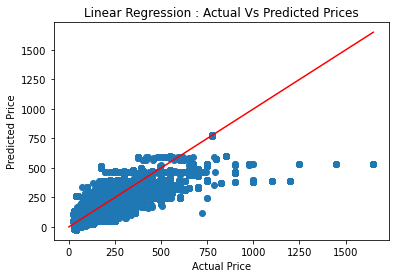

In [71]:
plt.scatter(y_test,y_pred_linreg,marker='o');
x = np.linspace(0,max(y_test));
plt.plot(x,x,color = 'r');
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Linear Regression : Actual Vs Predicted Prices');

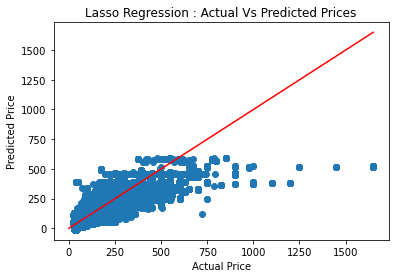

In [72]:
plt.scatter(y_test,y_pred_lasso,marker='o');
x = np.linspace(0,max(y_test));
plt.plot(x,x,color = 'r');
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Lasso Regression : Actual Vs Predicted Prices');

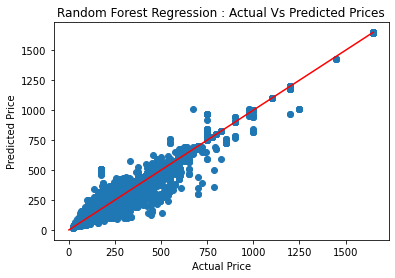

In [90]:
plt.scatter(y_test,y_pred_RF,marker='o');
x = np.linspace(0,max(y_test));
plt.plot(x,x,color = 'r');
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Random Forest Regression : Actual Vs Predicted Prices');

* Residuals Plot

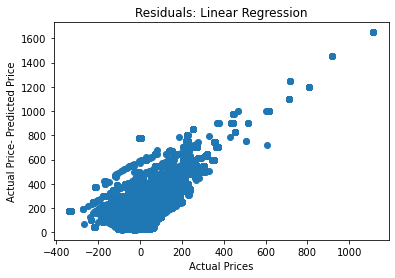

In [74]:
plt.scatter(y_test - y_pred_linreg,y_test);
plt.title('Residuals: Linear Regression');
plt.xlabel('Actual Prices');
plt.ylabel('Actual Price- Predicted Price');

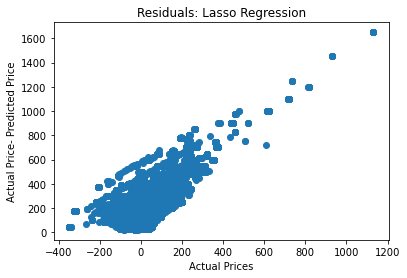

In [75]:
plt.scatter(y_test - y_pred_lasso,y_test);
plt.title('Residuals: Lasso Regression');
plt.xlabel('Actual Prices');
plt.ylabel('Actual Price- Predicted Price');

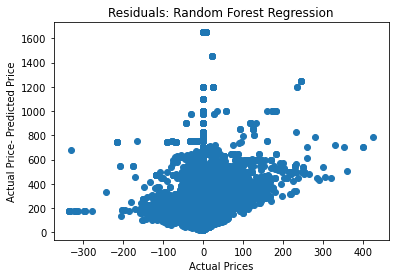

In [91]:
plt.scatter(y_test - y_pred_RF,y_test);
plt.title('Residuals: Random Forest Regression');
plt.xlabel('Actual Prices');
plt.ylabel('Actual Price- Predicted Price');

In [112]:
RFModel.feature_importances_.shape

(53,)

In [117]:
dfFeatureImportance = pd.DataFrame({
        'Features' : X_train.columns,
    'FeatureImportance' : RFModel.feature_importances_
}
)

In [129]:
dfFeatureImportance['FeatureImportance'] = dfFeatureImportance['FeatureImportance'] * 100

In [141]:
dfFeatureImportance.sort_values(by=['FeatureImportance'],ascending=False).reset_index().drop(['index'],axis=1)[:15]

,Features,FeatureImportance
0,bedrooms,48.609629
1,bathrooms,9.196497
2,room_type_Entire home/apt,5.502062
3,month,5.062995
4,accommodates,3.894780
5,reviews_per_month,3.691266
6,neighbourhood_group_cleansed_Downtown,3.191355
7,host_response_rate,2.942344
8,review_scores_rating,2.732233
9,host_is_superhost,2.582812


#### Summary: 